# Importing Libraries

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

# import dataset

In [17]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')

# Implement UCB 

In [18]:
import math
N = 500 # number of rounds
d = 10  # number of ads
ads_selected = []  # list to store selected ads
numbers_of_selections = [0] * d  # number of times each ad was selected
sums_of_rewards = [0] * d  # total reward for each ad
total_reward = 0  # total reward

for n in range(N):
    ad = 0
    max_upper_bound = 0  # initialize the maximum upper bound

    for i in range(d):
        if numbers_of_selections[i] > 0:
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = np.sqrt(3/2 * np.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400  # large number to ensure unselected ads are chosen first

        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i

    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = data.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

# Visualizing the Result

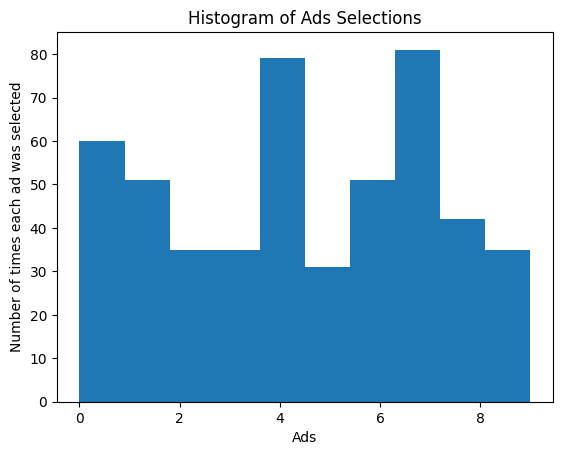

In [19]:
plt.hist(ads_selected)
plt.title('Histogram of Ads Selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()